# Import library and files xml

In [13]:
import cv2
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [14]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
glasses_eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

# Detect face and glasses function

In [15]:
def detect(gray,frame):
    IsStop = False
    faces = face_cascade.detectMultiScale(gray,1.5,5)
    print(faces)
    for (x,y,w,h) in faces :
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        
        roi_gray = gray[y:y+h,x:x+w]
        roi_frame = frame[y:y+h,x:x+w]
        
        glasses = glasses_eye_cascade.detectMultiScale(roi_gray,20,2)
        for (x1,y1,w1,h1) in glasses :
            cv2.rectangle(roi_frame, (x1,y1), (x1+w1,y1+h1), (0,255,0), 2)
        
        if len(glasses) == 2:
            IsStop = True
    return frame, IsStop

# Real time loop

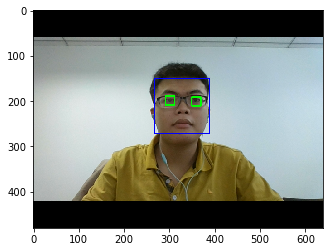

In [17]:
vc = cv2.VideoCapture(0) 

while True :
    _,ima = vc.read()
    grayscale = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)
    final,is_stop = detect(grayscale, ima) 
    ima_rgb = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    plt.imshow(ima_rgb)
    plt.show()
    sleep(0.5)
    if  is_stop == True:
        break 

vc.release() 
